In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [7]:
china_lambert=gpd.read_file('../publication/Figure/中国标准地图-审图号GS(2020)4619号-shp格式/国界线.shp')
province_lambert=gpd.read_file('../publication/Figure/中国标准地图-审图号GS(2020)4619号-shp格式/省级行政区.shp')

In [8]:
province_lambert.crs.to_string()

'PROJCS["China_Lambert_Conformal_Conic",GEOGCS["Beijing 1954",DATUM["Beijing_1954",SPHEROID["Krassowsky 1940",6378245,298.3,AUTHORITY["EPSG","7024"]],AUTHORITY["EPSG","6214"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["standard_parallel_1",30],PARAMETER["standard_parallel_2",62],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [ ]:
!pip install GDAL

In [9]:
from pyproj import CRS

# 你的PROJ字符串
proj_string = province_lambert.crs.to_string()

# 使用pyproj创建CRS对象
crs = CRS(proj_string)

# 将CRS对象转换为WKT字符串
wkt_string = crs.to_wkt()

print(wkt_string)


PROJCRS["China_Lambert_Conformal_Conic",BASEGEOGCRS["Beijing 1954",DATUM["Beijing 1954",ELLIPSOID["Krassowsky 1940",6378245,298.3,LENGTHUNIT["metre",1]],ID["EPSG",6214]],PRIMEM["Greenwich",0,ANGLEUNIT["Degree",0.0174532925199433]]],CONVERSION["unnamed",METHOD["Lambert Conic Conformal (2SP)",ID["EPSG",9802]],PARAMETER["Latitude of false origin",0,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8821]],PARAMETER["Longitude of false origin",105,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8822]],PARAMETER["Latitude of 1st standard parallel",30,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8823]],PARAMETER["Latitude of 2nd standard parallel",62,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8824]],PARAMETER["Easting at false origin",0,LENGTHUNIT["metre",1],ID["EPSG",8826]],PARAMETER["Northing at false origin",0,LENGTHUNIT["metre",1],ID["EPSG",8827]]],CS[Cartesian,2],AXIS["easting",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["northing",north,ORDER[2],LENGTHUNIT["metre

In [ ]:
import os
import sys
import string
import osgeo.osr

if (len(sys.argv) <> 2):
        print 'Usage: proj2wkt.py [Proj4 Projection Text]'
else:
        srs = osgeo.osr.SpatialReference()
        srs.ImportFromProj4(sys.argv[1])
        print srs.ExportToWkt()

In [ ]:
from osgeo import osr

# 你的PROJ字符串
proj_string = '+proj=lcc +lat_1=45 +lat_2=55 +lat_0=50 +lon_0=-107 +x_0=500000 +y_0=500000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'

# 创建一个空的空间参考对象
srs = osr.SpatialReference()

# 从PROJ字符串导入
srs.ImportFromProj4(proj_string)

# 将空间参考对象转换为WKT格式
wkt = srs.ExportToWkt()

print(wkt)


把各种数据拼接到province_lambert

In [5]:
province_lambert.columns

Index(['Z120401', 'Z121301', 'Z120402', 'Z120602', 'Z121102', 'Z121302',
       'Z120403', 'Z120603', 'Z120703', 'Z120803',
       ...
       'Rural_to_T', 'Sci_Eng_Co', 'Sec_Indust', 'Teri_Indus', 'Total_Coll',
       'Urban_to_T', 'Vocation', 'DZM', 'NAME', 'geometry'],
      dtype='object', length=121)

In [6]:
province_lambert=province_lambert[['NAME', 'geometry']]
province_lambert

,NAME,geometry
0,黑龙江,"POLYGON ((1329152.341 5619034.278, 1323327.591..."
1,新疆,"POLYGON ((-2189253.375 4611401.367, -2202922.3..."
2,山西,"POLYGON ((761692.092 4443124.843, 760999.873 4..."
3,宁夏,"POLYGON ((-34477.046 4516813.963, -41105.128 4..."
4,西藏,"POLYGON ((-2189253.375 4611401.367, -2187861.9..."
5,山东,"POLYGON ((915805.657 4438424.999, 917551.296 4..."
6,河南,"POLYGON ((915805.657 4438424.999, 913869.987 4..."
7,江苏,"POLYGON ((1261146.339 4381810.235, 1264548.546..."
8,安徽,"POLYGON ((1016688.415 4289114.800, 1018854.016..."
9,湖北,"POLYGON ((547929.620 4087821.980, 551532.202 4..."


In [14]:
from src.const import province_dict
for i in range(len(province_lambert)):
    chinese=province_lambert.iloc[i]['NAME']
    province_lambert.loc[i,'province']=province_dict[chinese]
province_lambert

,NAME,geometry,province
0,黑龙江,"POLYGON ((1329152.341 5619034.278, 1323327.591...",Heilongjiang
1,新疆,"POLYGON ((-2189253.375 4611401.367, -2202922.3...",Xinjiang
2,山西,"POLYGON ((761692.092 4443124.843, 760999.873 4...",Shanxi
3,宁夏,"POLYGON ((-34477.046 4516813.963, -41105.128 4...",Ningxia
4,西藏,"POLYGON ((-2189253.375 4611401.367, -2187861.9...",Tibet
5,山东,"POLYGON ((915805.657 4438424.999, 917551.296 4...",Shandong
6,河南,"POLYGON ((915805.657 4438424.999, 913869.987 4...",Henan
7,江苏,"POLYGON ((1261146.339 4381810.235, 1264548.546...",Jiangsu
8,安徽,"POLYGON ((1016688.415 4289114.800, 1018854.016...",Anhui
9,湖北,"POLYGON ((547929.620 4087821.980, 551532.202 4...",Hubei


In [17]:
W=pd.read_csv('../data/renewable potential/total_potential.csv')
W=W.iloc[:-1,:]

In [27]:
map_with_data=pd.concat([province_lambert.set_index('province'),W.set_index('province')],axis=1)
map_with_data=map_with_data.reset_index()
map_with_data

,province,NAME,geometry,W_Wind,W_PV,W_hydro,W_nuclear,W_total
0,Heilongjiang,黑龙江,"POLYGON ((1329152.341 5619034.278, 1323327.591...",1937.0,394.00,49.365733,18.133200,2398.498933
1,Xinjiang,新疆,"POLYGON ((-2189253.375 4611401.367, -2202922.3...",1293.0,29265.00,64.150045,0.000000,30622.150044
2,Shanxi,山西,"POLYGON ((761692.092 4443124.843, 760999.873 4...",364.0,439.00,87.116000,0.000000,890.116000
3,Ningxia,宁夏,"POLYGON ((-34477.046 4516813.963, -41105.128 4...",241.0,391.00,24.773612,0.000000,656.773613
4,Tibet,西藏,"POLYGON ((-2189253.375 4611401.367, -2187861.9...",1375.0,6177.00,308.557612,0.000000,7860.557612
5,Shandong,山东,"POLYGON ((915805.657 4438424.999, 917551.296 4...",1636.0,552.00,29.692037,159.485436,2377.177473
6,Henan,河南,"POLYGON ((915805.657 4438424.999, 913869.987 4...",869.0,377.00,85.155890,59.130000,1390.285890
7,Jiangsu,江苏,"POLYGON ((1261146.339 4381810.235, 1264548.546...",1200.0,372.00,25.953308,72.043992,1669.997300
8,Anhui,安徽,"POLYGON ((1016688.415 4289114.800, 1018854.016...",679.0,280.00,54.048218,110.376000,1123.424218
9,Hubei,湖北,"POLYGON ((547929.620 4087821.980, 551532.202 4...",558.0,188.00,236.951890,110.376000,1093.327890


In [28]:
production_upper=pd.read_csv('../data/production_potential/production_upper.csv')
eletricity_consumption=pd.read_csv('../data/production_potential/electricity consumption.csv')
production_upper

,province,0
0,Anhui,1.214977e+10
1,Beijing,0.000000e+00
2,Chongqing,0.000000e+00
3,Fujian,1.600154e+10
4,Gansu,8.789401e+10
5,Guangdong,2.736980e+10
6,Guangxi,1.531217e+10
7,Guizhou,4.297274e+09
8,Hainan,1.071437e+10
9,Hebei,1.943406e+10


In [29]:
eletricity_consumption=eletricity_consumption.iloc[:,[0,-1]]
eletricity_consumption

,province,2060
0,Beijing,221.424661
1,Tianjin,173.113683
2,Hebei,767.575987
3,Shanxi,461.541585
4,Inner Mongolia,734.331988
5,Liaoning,466.661173
6,Jilin,153.901541
7,Heilongjiang,196.266294
8,Shanghai,310.141181
9,Jiangsu,1256.404998


In [30]:
map_with_data=pd.concat([map_with_data.set_index('province'),production_upper.set_index('province')],axis=1)
map_with_data=pd.concat([map_with_data,eletricity_consumption.set_index('province')],axis=1)
map_with_data=map_with_data.reset_index()
map_with_data

,province,NAME,geometry,W_Wind,W_PV,W_hydro,W_nuclear,W_total,0,2060
0,Heilongjiang,黑龙江,"POLYGON ((1329152.341 5619034.278, 1323327.591...",1937.0,394.00,49.365733,18.133200,2398.498933,4.155156e+10,196.266294
1,Xinjiang,新疆,"POLYGON ((-2189253.375 4611401.367, -2202922.3...",1293.0,29265.00,64.150045,0.000000,30622.150044,5.662382e+11,611.525248
2,Shanxi,山西,"POLYGON ((761692.092 4443124.843, 760999.873 4...",364.0,439.00,87.116000,0.000000,890.116000,8.086310e+09,461.541585
3,Ningxia,宁夏,"POLYGON ((-34477.046 4516813.963, -41105.128 4...",241.0,391.00,24.773612,0.000000,656.773613,8.528801e+09,204.747138
4,Tibet,西藏,"POLYGON ((-2189253.375 4611401.367, -2187861.9...",1375.0,6177.00,308.557612,0.000000,7860.557612,1.479913e+11,17.019392
5,Shandong,山东,"POLYGON ((915805.657 4438424.999, 917551.296 4...",1636.0,552.00,29.692037,159.485436,2377.177473,1.962518e+10,1337.042962
6,Henan,河南,"POLYGON ((915805.657 4438424.999, 913869.987 4...",869.0,377.00,85.155890,59.130000,1390.285890,1.383731e+10,656.908566
7,Jiangsu,江苏,"POLYGON ((1261146.339 4381810.235, 1264548.546...",1200.0,372.00,25.953308,72.043992,1669.997300,7.803628e+09,1256.404998
8,Anhui,安徽,"POLYGON ((1016688.415 4289114.800, 1018854.016...",679.0,280.00,54.048218,110.376000,1123.424218,1.214977e+10,479.486417
9,Hubei,湖北,"POLYGON ((547929.620 4087821.980, 551532.202 4...",558.0,188.00,236.951890,110.376000,1093.327890,1.251527e+10,430.018367


In [31]:
map_with_data.rename(columns={'0':'prod_upper'},inplace=True)
map_with_data.rename(columns={'2060':'elec_cons'},inplace=True)

In [ ]:
map_with_data['prod_upper']=map_with_data['prod_upper']/1e9
map_with_data

In [97]:
map_with_data.to_file('../data/geodata_lambert/map_with_data1.shp', encoding='utf-8')

In [69]:
prod_upper=map_with_data[['province','prod_upper']]
sorted_prod_upper=prod_upper.sort_values(by='prod_upper',ascending=False)
sorted_prod_upper.set_index('province',inplace=True)

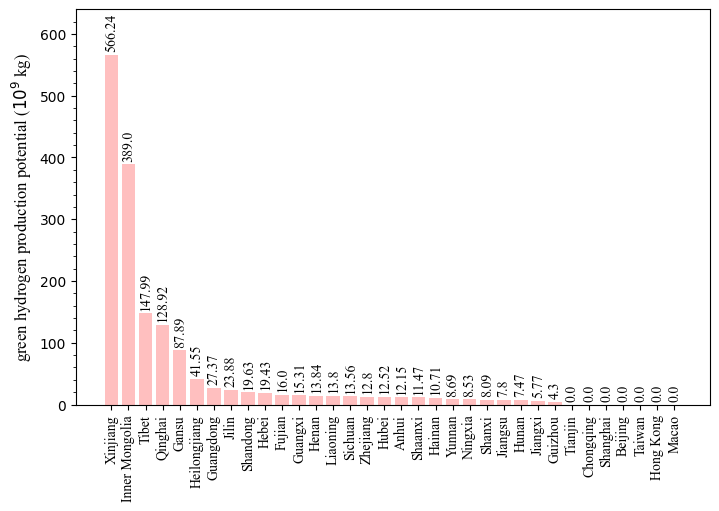

In [92]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(7.083, 5), layout='constrained')
x=range(len(sorted_prod_upper))  # 确定柱状图数量,可以认为是x方向刻度
y=round(sorted_prod_upper['prod_upper']/(1e9),2)  # y方向刻度
ax.set_xticks(range(len(sorted_prod_upper)), sorted_prod_upper.index,rotation='vertical',fontsize=10,fontname='Times New Roman')
plt.yticks(fontsize=10)
ax.bar(x, y,color='#ffbfbf')  # 绘制y刻度标签  风能：#a7e2b7  太阳能：#fffc54 核能：'#e2c9a7' 水能：#a7cae2  上限：#ffbfbf
ax.set_ylabel(r'green hydrogen production potential ($10^9$ kg)',fontsize=12,fontname='Times New Roman')  # y轴标签
# 在每个柱子上方添加数值
for i, v in enumerate(y):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
#设置网格刻度

ax.minorticks_on()
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
plt.ylim(0, max(y) * 1.13)

plt.savefig('C:/Users/ASUS/Documents/research/hydrogen production/publication/Figure/renewable energy resource/bar_svg/prod_upper.svg')  # 保存为SVG格式
plt.show()

In [76]:
sorted_elec=map_with_data[['province','elec_cons']]
sorted_elec=sorted_elec.sort_values(by='elec_cons',ascending=False)
sorted_elec.set_index('province',inplace=True)

In [80]:
sorted_elec

,elec_cons
province,
Guangdong,1378.614294
Shandong,1337.042962
Jiangsu,1256.404998
Zhejiang,963.871681
Hebei,767.575987
Inner Mongolia,734.331988
Henan,656.908566
Xinjiang,611.525248
Sichuan,572.116734


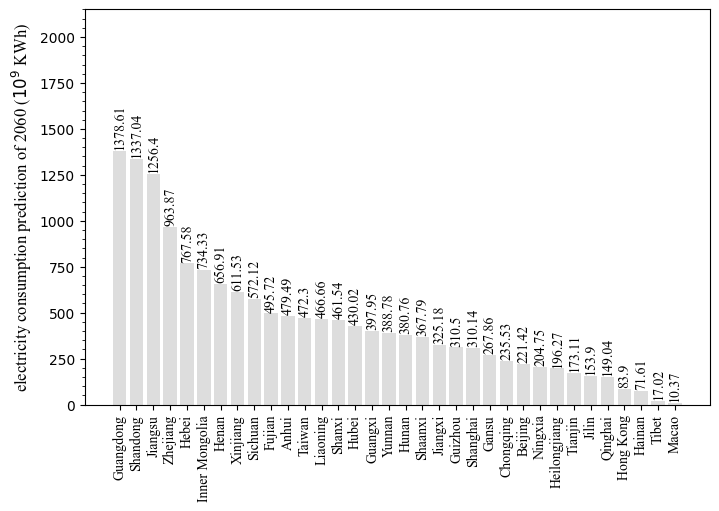

In [100]:
fig, ax = plt.subplots(figsize=(7.083, 5), layout='constrained')
x=range(len(sorted_elec))  # 确定柱状图数量,可以认为是x方向刻度
y=round(sorted_elec['elec_cons'],2)  # y方向刻度
ax.set_xticks(range(len(sorted_elec)), sorted_elec.index,rotation='vertical',fontsize=10,fontname='Times New Roman')
plt.yticks(fontsize=10)
ax.bar(x, y,color='#dddddd')  # 绘制y刻度标签  风能：#a7e2b7  太阳能：#fffc54 核能：'#e2c9a7' 水能：#a7cae2  上限：#ffbfbf
ax.set_ylabel(r'electricity consumption prediction of 2060 ($10^9$ KWh)',fontsize=12,fontname='Times New Roman')  # y轴标签
# 在每个柱子上方添加数值
for i, v in enumerate(y):
    ax.text(i, v + 25, str(v), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
#设置网格刻度
ax.minorticks_on()
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
plt.ylim(0, max(y) * 1.56)
plt.savefig('C:/Users/ASUS/Documents/research/hydrogen production/publication/Figure/renewable energy resource/bar_svg/elec_cons.svg')  # 保存为SVG格式
plt.show()

In [113]:
industryGDP=pd.read_csv('../data/consumption_potential/industryGDP_ratio.csv')
freight=pd.read_csv('../data/consumption_potential/freight_ratio.csv')

In [114]:
freight=freight.iloc[:,[0,-1]]
industryGDP=industryGDP.iloc[:,[0,-1]]
freight

,province,freight_ratio
0,Shandong,14.709356
1,Guangdong,13.195759
2,Anhui,13.075943
3,Henan,11.830020
4,Hebei,10.963018
5,Zhejiang,10.865937
6,Hunan,9.954925
7,Jiangxi,9.309686
8,Jiangsu,8.963113
9,Sichuan,8.905773


In [ ]:
map_with_data=gpd.read_file('../data/geodata_lambert/map_with_data1.shp', encoding='utf-8')

In [116]:
map_with_data=pd.concat([map_with_data.set_index('province'),industryGDP.set_index('province')],axis=1)
map_with_data=pd.concat([map_with_data,freight.set_index('province')],axis=1)
map_with_data=map_with_data.reset_index()
map_with_data

,province,NAME,W_Wind,W_PV,W_hydro,W_nuclear,W_total,prod_upper,elec_cons,geometry,industryGDP_ratio,freight_ratio
0,Heilongjiang,黑龙江,1937.0,394.00,49.365733,18.133200,2398.498933,41.551559,196.266294,"POLYGON ((1329152.341 5619034.278, 1323327.591...",2.065531,2.088569
1,Xinjiang,新疆,1293.0,29265.00,64.150045,0.000000,30622.150044,566.238204,611.525248,"POLYGON ((-2189253.375 4611401.367, -2202922.3...",2.855450,3.157591
2,Shanxi,山西,364.0,439.00,87.116000,0.000000,890.116000,8.086310,461.541585,"POLYGON ((761692.092 4443124.843, 760999.873 4...",6.003178,5.739429
3,Ningxia,宁夏,241.0,391.00,24.773612,0.000000,656.773613,8.528801,204.747138,"POLYGON ((-34477.046 4516813.963, -41105.128 4...",0.993763,1.968940
4,Tibet,西藏,1375.0,6177.00,308.557612,0.000000,7860.557612,147.991287,17.019392,"POLYGON ((-2189253.375 4611401.367, -2187861.9...",0.100894,0.218185
5,Shandong,山东,1636.0,552.00,29.692037,159.485436,2377.177473,19.625179,1337.042962,"POLYGON ((915805.657 4438424.999, 917551.296 4...",14.363901,14.709356
6,Henan,河南,869.0,377.00,85.155890,59.130000,1390.285890,13.837308,656.908566,"POLYGON ((915805.657 4438424.999, 913869.987 4...",9.733340,11.830020
7,Jiangsu,江苏,1200.0,372.00,25.953308,72.043992,1669.997300,7.803628,1256.404998,"POLYGON ((1261146.339 4381810.235, 1264548.546...",24.356004,8.963113
8,Anhui,安徽,679.0,280.00,54.048218,110.376000,1123.424218,12.149770,479.486417,"POLYGON ((1016688.415 4289114.800, 1018854.016...",6.862312,13.075943
9,Hubei,湖北,558.0,188.00,236.951890,110.376000,1093.327890,12.515274,430.018367,"POLYGON ((547929.620 4087821.980, 551532.202 4...",8.668233,7.924623


In [117]:
map_with_data.to_file('../data/geodata_lambert/map_with_data1.shp', encoding='utf-8')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12484\3232577495.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  map_with_data.to_file('../data/geodata_lambert/map_with_data1.shp', encoding='utf-8')
